In [1]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_155fc2028d1d4f8ba7d4de3b7fb84b01.csv"
df=pd.read_csv(url)
df.head()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,0.0,7355.24,1512.22,0.20559,75.0114,9.932829e+05,115.5560,3464.68,27,36.6828
1,0.0,7735.44,1706.44,0.22060,73.5278,1.097282e+06,104.0530,3952.37,49,35.0952
2,0.0,6812.34,2568.01,0.37696,60.4717,9.894945e+05,90.1892,3259.48,34,38.9395
3,0.0,7932.62,1994.97,0.25148,69.8073,1.110612e+06,115.5150,3623.06,4,35.7825
4,0.0,8589.53,1928.45,0.22451,58.7719,1.203017e+06,95.4863,3379.23,23,41.3394


In [2]:
df.shape

(45730, 10)

In [3]:
y=df[["RMSD"]]
X=df.drop(["RMSD"],axis=1)

In [4]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


test = SelectKBest(score_func=f_regression, k="all")
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
2,7450.746195
3,1357.101935
1,1154.052523
8,181.233240
5,59.786936
0,10.411175
4,8.941336
6,0.509913
7,0.005412


In [5]:
X_scores=scores[scores["scores"]>0]
len(X_scores)

9

In [6]:
Xp=X.iloc[:,X_scores.index]
Xp.head()

,F3,F4,F2,F9,F6,F1,F5,F7,F8
0,0.20559,75.0114,1512.22,36.6828,115.5560,7355.24,9.932829e+05,3464.68,27
1,0.22060,73.5278,1706.44,35.0952,104.0530,7735.44,1.097282e+06,3952.37,49
2,0.37696,60.4717,2568.01,38.9395,90.1892,6812.34,9.894945e+05,3259.48,34
3,0.25148,69.8073,1994.97,35.7825,115.5150,7932.62,1.110612e+06,3623.06,4
4,0.22451,58.7719,1928.45,41.3394,95.4863,8589.53,1.203017e+06,3379.23,23


In [7]:
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
Xp=pd.DataFrame(scaler1.fit_transform(Xp),columns=Xp.columns)
Xp.head()

,F3,F4,F2,F9,F6,F1,F5,F7,F8
0,-1.539344,-0.513872,-1.027889,0.361078,-0.429753,-0.620084,-0.664886,-0.263387,-0.760717
1,-1.300655,-0.540640,-0.895253,0.095580,-0.594085,-0.526394,-0.480501,-0.018753,-0.371287
2,1.185783,-0.776206,-0.306873,0.738472,-0.792144,-0.753866,-0.671603,-0.366319,-0.636808
3,-0.809601,-0.607767,-0.698212,0.210519,-0.430339,-0.477805,-0.456867,-0.183941,-1.167849
4,-1.238478,-0.806875,-0.743639,1.139814,-0.716469,-0.315928,-0.293038,-0.306250,-0.831523


In [8]:
scaler2=StandardScaler()
yp=pd.DataFrame(scaler2.fit_transform(y),columns=y.columns)
yp.head()

,RMSD
0,-1.266463
1,-1.266463
2,-1.266463
3,-1.266463
4,-1.266463


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xp,yp,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(36584, 9)
(9146, 9)


In [10]:
#from sklearn.model_selection import GridSearchCV

In [11]:
#param_grid = {'max_depth': [10, 25, 30, 35],'min_samples_leaf': [3, 4, 5],'min_samples_split': [2, 3, 4],'n_estimators': [1500, 2000, 3500, 4000]}

In [12]:
#from sklearn.ensemble import GradientBoostingRegressor
#gradient=GradientBoostingRegressor(random_state=0)

In [13]:
#grid_search = GridSearchCV(estimator = gradient, param_grid = param_grid,cv = 3, scoring="neg_root_mean_squared_error", n_jobs = -1, verbose = 2)

In [14]:
#grid_search.fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))

In [15]:
#grid_search.best_params_

In [16]:
#best_grid = grid_search.best_estimator_

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
model1=GradientBoostingRegressor(n_estimators=8000,learning_rate=0.015,min_samples_split=4,max_depth=12,
                                 random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
model1

GradientBoostingRegressor(learning_rate=0.015, max_depth=12,
                          min_samples_split=4, n_estimators=8000,
                          random_state=0)

In [18]:
from sklearn.metrics import mean_squared_error as mse
train_pred=model1.predict(X_train)
test_pred=model1.predict(X_test)

In [19]:
y_train=scaler2.inverse_transform(y_train)
y_test=scaler2.inverse_transform(y_test)

In [20]:
train_pred=scaler2.inverse_transform(train_pred)
test_pred=scaler2.inverse_transform(test_pred)

In [21]:
print("Root mean squared error for train data: ",np.sqrt(mse(y_train,train_pred)))
print("Root mean squared error for test data: ",np.sqrt(mse(y_test,test_pred)))

Root mean squared error for train data:  0.1602600826575212
Root mean squared error for test data:  3.4341480070737544


In [22]:
from sklearn.metrics import r2_score
print("R-squared for train data: ",r2_score(y_train,train_pred))
print("R-squared for test data: ",r2_score(y_test,test_pred))

R-squared for train data:  0.9993134614607022
R-squared for test data:  0.685707163544802


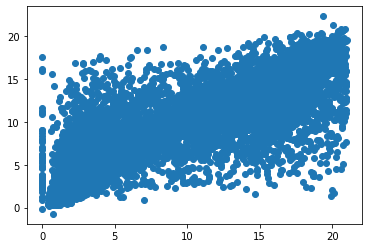

In [23]:
import matplotlib.pyplot as plt
plt.scatter(y_test,test_pred)
plt.show()